In [ ]:
#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Load Dataset

In [2]:
import kagglehub

path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")
print("Path to dataset files:", path)


100%|██████████| 228M/228M [00:01<00:00, 120MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7


In [3]:
csv_file = path + "/movies_metadata.csv"
df = pd.read_csv(csv_file, low_memory=False)
df.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
#Clean and prep data

In [5]:
for c in ['budget','revenue','runtime','vote_average','popularity']:
    df[c] = pd.to_numeric(df[c], errors='coerce')


In [6]:
df_clean= df.dropna(subset=['budget','revenue','runtime','vote_average','popularity']).copy()
df_clean= df_clean[(df_clean['budget']>0)& (df_clean['revenue']>0)]

In [11]:
df_clean['budget_log'] = np.log1p(df_clean['budget'])
df_clean['revenue_log'] = np.log1p(df_clean['revenue'])

In [ ]:
#Select features and scale

In [10]:
features = ['budget_log','revenue_log','runtime','vote_average','popularity']
X = df_clean[features].values

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# elbow method

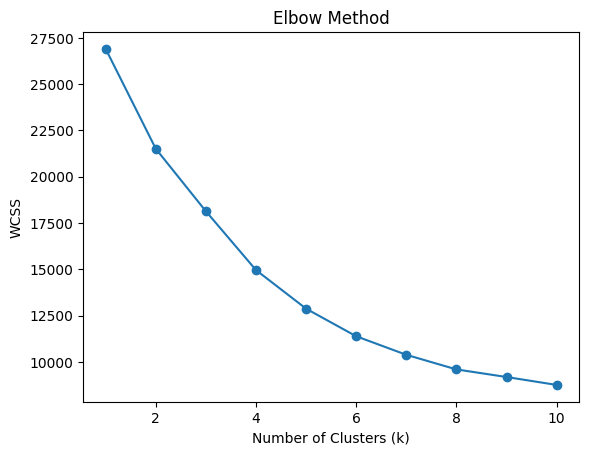

In [12]:
wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [ ]:
#Apply K-means

In [13]:
k=4
kmeans= KMeans(n_clusters=k , random_state=42)
df_clean['cluster']= kmeans.fit_predict(X_scaled)

In [ ]:
#Visualization

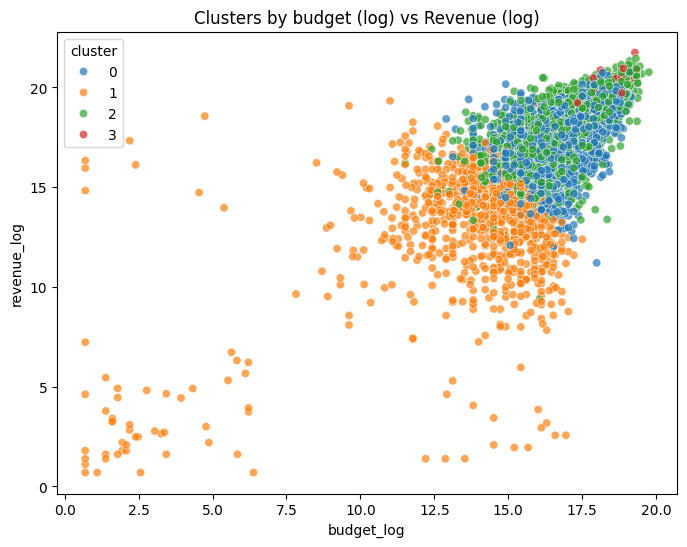

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='budget_log', y='revenue_log', hue='cluster', palette='tab10', alpha=0.7)
plt.title('Clusters by budget (log) vs Revenue (log)')
plt.show ()

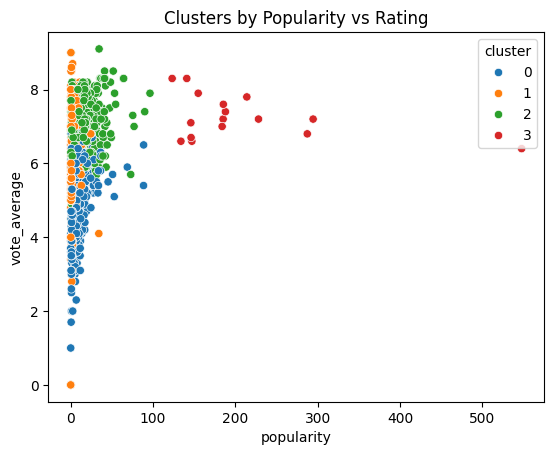

In [16]:
sns.scatterplot(data=df_clean, x='popularity', y='vote_average', hue='cluster', palette='tab10')
plt.title('Clusters by Popularity vs Rating')
plt.show()

In [ ]:
#Analyzing cluster centers

In [17]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
import pandas as pd
pd.DataFrame(centers, columns=features)


,budget_log,revenue_log,runtime,vote_average,popularity
0,16.887568,17.360112,100.036933,5.748615,8.912954
1,13.531078,12.933953,98.027979,6.290674,5.049961
2,16.824337,17.829073,128.411950,6.942767,11.642974
3,18.381789,20.258968,129.625000,7.256250,206.561415
